In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Morse potential

The Morse potential is written as

$$
V(r) = D \left(1 - e^{-\alpha(r - r_e)}\right)^2 
$$

The derivative of the Morse potential with respect to the distance is

$$
\frac{{dV(r)}}{{dr}} = 
2D\alpha e^{-\alpha(r - r_e)} \left(1 - e^{-\alpha(r - r_e)}\right)
$$

In [3]:
# Morse potential parameters
D         = 1.5  # kJ 
alpha     = 1.0  # nm-1  # Parameter determining the width of the well
re        = 1.5  # nm

# Define the function to calculate the Morse potential
def morse_potential(r):
    
    # r is the distance between two atoms
    # We shift the potential $V(r)$ by $D$ in order to have the minimum $V(r_e) = - D$.

    pot =     D * ( 1 - np.exp( - alpha * ( r - re ) ) ) ** 2 - D
        
    return pot

# Define the function to calculate the derivative of the Morse potential
def der_morse_potential(r):
    
    der = 2 * D * alpha * np.exp( - alpha * ( r - re ) ) * ( 1 - np.exp( - alpha * ( r - re ) ) ) 
    
    return der

In [4]:
# Distance range
rmin = 0.1
rmax = 5
N    = 100
r    = np.linspace(rmin, rmax, N)

# Compute potential energy
potential     = morse_potential(r)

# Compute derivative
der_potential = der_morse_potential(r)

# Compute force
force         = - der_potential

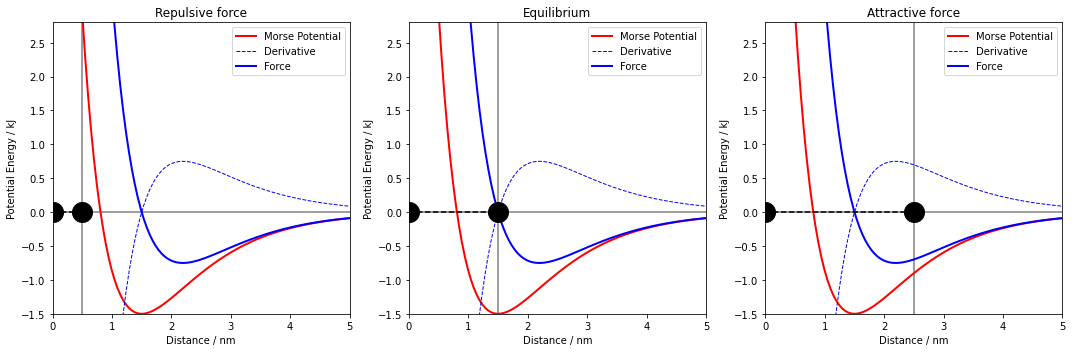

In [5]:
# This command is used to create three graphs in a row in the same figure
fig, (ax1, ax2, ax3)= plt.subplots(1, 3, figsize=(15,5)) 

# First plot
xpos = 0.5
ax1.axhline(y=0, color='grey')
ax1.axvline(x=xpos, color='grey')

ax1.plot(r,         potential,     'r',  linewidth = 2, label='Morse Potential')
ax1.plot(r,         der_potential, 'b--',  linewidth = 1, label='Derivative')
ax1.plot(r,         force,         'b',  linewidth = 2, label='Force')

ax1.plot([0, xpos], [0, 0],        'k--')
ax1.plot([0, xpos], [0, 0],        'ko', markersize = 20)

ax1.set_xlim((0,  rmax))
ax1.set_ylim((-D, 2.8))

ax1.set_xlabel('Distance / nm')
ax1.set_ylabel('Potential Energy / kJ')
ax1.set_title('Repulsive force')
ax1.legend()

# Second plot
xpos = re
ax2.axhline(y=0, color='grey')
ax2.axvline(x=xpos, color='grey')

ax2.plot(r,         potential,     'r',  linewidth = 2, label='Morse Potential')
ax2.plot(r,         der_potential, 'b--',  linewidth = 1, label='Derivative')
ax2.plot(r,         force,         'b',  linewidth = 2, label='Force')

ax2.plot([0, xpos], [0, 0],        'k--')
ax2.plot([0, xpos], [0, 0],        'ko', markersize = 20)

ax2.set_xlim((0,  rmax))
ax2.set_ylim((-D, 2.8))

ax2.set_xlabel('Distance / nm')
ax2.set_ylabel('Potential Energy / kJ')
ax2.set_title('Equilibrium')
ax2.legend()

# Third plot
xpos = 2.5
ax3.axhline(y=0, color='grey')
ax3.axvline(x=xpos, color='grey')

ax3.plot(r,         potential,     'r',  linewidth = 2, label='Morse Potential')
ax3.plot(r,         der_potential, 'b--',  linewidth = 1, label='Derivative')
ax3.plot(r,         force,         'b',  linewidth = 2, label='Force')

ax3.plot([0, xpos], [0, 0],        'k--')
ax3.plot([0, xpos], [0, 0],        'ko', markersize = 20)

ax3.set_xlim((0,  rmax))
ax3.set_ylim((-D, 2.8))

ax3.set_xlabel('Distance / nm')
ax3.set_ylabel('Potential Energy / kJ')
ax3.set_title('Attractive force')
ax3.legend()


# This command is used to fix the margins
fig.tight_layout()

#fig.savefig('morse_potential.pdf', format='pdf', dpi=900, bbox_inches='tight')